# Задача 6

Решить задачу Коши

$$\frac{dx}{dt} = -x, \;\;\; x(0) = 1, \;\;\; 0 < t < 3$$

методом Эйлера первого порядка точности и методами Рунге-Кутты второго и четвертого порядка точности.

## Решение 

In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np

Общий вид задачи Коши:

$$\frac{dx(t)}{dt} = f(t, x(t)), \;\;\; x(a) = x_a, \;\;\; a \leq t \leq b$$

Задам функцию из правой части, отрезок и начальное значение.

In [3]:
def func(x, t):
    return -x

a = 0
b = 3

x_a = 1

Аналитическое решение:

In [4]:
def solution(t):
    return math.exp(-t)

Функция для генерирования списка с ошибками в зависимости от числа интервалов разбиения `N`.

Ошибки для каждого `N` вычисляются как максимальный по всем точкам модуль разности вычисленного значения в `results` и аналитического решения `solution` в данной точке отрезка.

In [5]:
def calculate_err(results, solution):
    err_s = []
    for N in results.keys():
        err_s.append(max([abs(results[N][1][i] - solution(results[N][0][i])) for i in range(len(results[N][0]))]))
    return err_s

### Метод Эйлера

$$x_{n+1} = x_n + h_nf(t, x_n), \;\;\; h_n \equiv t_{n+1} - t_n$$

Имеет первый порядок точности по шагу сетки $h$. 

Возьму равномерный шаг сетки. `N` - число интервалов разбиения отрезка по $t$.

In [6]:
def euler_solve(f, a, b, x_a, N):
    
    x_s = []
    t_s = []
    
    h = (b - a)/N
    
    x_prev = x_a
    t_s.append(a)
    x_s.append(x_a)
    
    for i in range(1, N+1):
        t_s.append(a + i*h)
        x_s.append(x_s[i-1] + h*f(x=x_s[i-1], t=t_s[i]))
        
    return t_s, x_s

Проведу вычисления и сохраню результаты для различных `N` - количестве интервалов по $t$.

In [10]:
res_euler = dict()
for N in range(1, 1010, 10):
    res_euler[N] = [[],[]]
    t_s, x_s = euler_solve(f=func, a=a, b=b, x_a=x_a, N=N)
    res_euler[N][0] = t_s
    res_euler[N][1] = x_s

**График $x(t)$ при заданном количестве интервалов разбиения N:**

N = 101


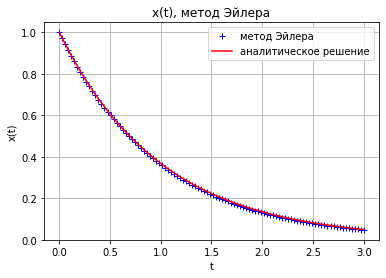

In [16]:
N = list(res_euler.keys())[10]
print("N =", N)
plt.plot(res_euler[N][0], res_euler[N][1], 'b+', label="метод Эйлера")
plt.plot(res_euler[N][0], [solution(t) for t in res_euler[N][0]], 'r', label="аналитическое решение")
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t), метод Эйлера')
plt.legend()
plt.show()

**График зависимости максимальной ошибки от N:**

Максимальная ошибка - модуль разности вычисленного значения и аналитического решения в данной точке. Максимум вычисляется по всем точкам заданного интервала по $t$ для каждого значения `N`.

In [17]:
err_euler = calculate_err(res_euler, solution)

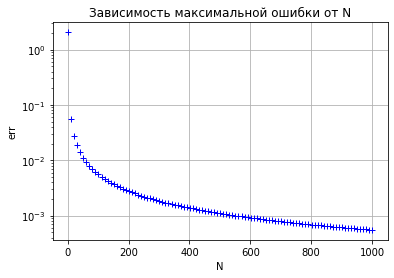

In [18]:
plt.plot(list(res_euler.keys())[0:], err_euler[0:], 'b+')
plt.grid()
plt.xlabel('N')
plt.ylabel('err')
plt.title('Зависимость максимальной ошибки от N')
plt.yscale('log')
plt.show()

### Метод Рунге-Кутты 2-го порядка

$$x_{n+1} = x_n + h[(1 - \alpha)f(t_n, x_n) + \alpha f (t_n + \frac{h}{2\alpha}, x_n + \frac{h}{2\alpha}f(t_n,x_n))]$$

Точность: второй порядок по шагу сетки $h$. 

Для минимизации численного коэффициента при $h^2$ в остаточном члене в общем случае следует использовать $\alpha = 3/4$.

Возьму равномерный шаг сетки. `N` - число интервалов разбиения отрезка по $t$.

In [19]:
def rk2_solve(f, a, b, x_a, N, alpha=0.75):
    x_s = []
    t_s = []
    
    h = (b - a)/N
    
    t_s.append(a)
    x_s.append(x_a)
    
    for i in range(1, N+1):
        t_s.append(a + i*h)
        x_s.append(x_s[i-1] + h*((1-alpha)*f(t=t_s[i-1], x=x_s[i-1]) + alpha*f(t=(t_s[i-1] + h/(2*alpha)), x=(x_s[i-1] + h/(2*alpha)*f(t=t_s[i-1], x=x_s[i-1])))))
        
    return t_s, x_s

Проведу вычисления и сохраню результаты для различных `N` - количестве интервалов по $t$.

In [20]:
res_rk2 = dict()
for N in range(1, 1010, 10):
    res_rk2[N] = [[],[]]
    t_s, x_s = rk2_solve(f=func, a=a, b=b, x_a=x_a, N=N)
    res_rk2[N][0] = t_s
    res_rk2[N][1] = x_s

**График $x(t)$ при заданном количестве интервалов разбиения N:**

N = 101


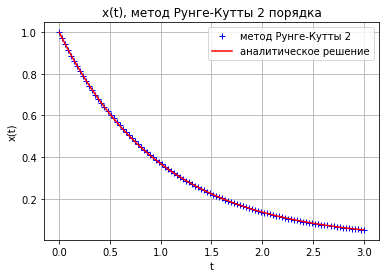

In [21]:
N = list(res_rk2.keys())[10]
print("N =", N)
plt.plot(res_rk2[N][0], res_rk2[N][1], 'b+', label="метод Рунге-Кутты 2")
plt.plot(res_rk2[N][0], [solution(t) for t in res_rk2[N][0]], 'r', label="аналитическое решение")
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t), метод Рунге-Кутты 2 порядка')
plt.legend()
plt.show()

**График зависимости максимальной ошибки от N:**

Максимальная ошибка - модуль разности вычисленного значения и аналитического решения в данной точке. Максимум вычисляется по всем точкам заданного интервала по $t$ для каждого значения `N`.

In [22]:
err_rk2 = calculate_err(res_rk2, solution)

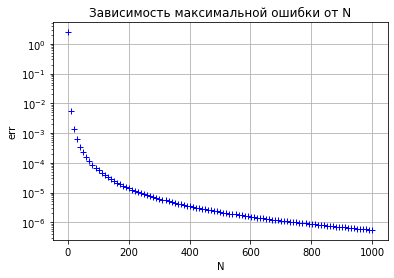

In [23]:
plt.plot(list(res_rk2.keys())[0:], err_rk2[0:], 'b+')
plt.grid()
plt.xlabel('N')
plt.ylabel('err')
plt.title('Зависимость максимальной ошибки от N')
plt.yscale('log')
plt.show()

### Метод Рунге-Кутты 4-го порядка

$$x_{n+1} = x_n + \frac{h}{6}[k_1 + 2k_2 + 2k_3 + k_4]$$

$$k_1 = f(t_n, x_n)$$

$$k_2 = f(t_n + \frac{h}{2}, x_n + \frac{h}{2}k_1)$$

$$k_3 = f(t_n + \frac{h}{2}, x_n + \frac{h}{2}k_2)$$

$$k_4 = f(t_n + h, x_n + hk_3)$$

Точность: четвертый порядок по шагу сетки $h$. 

Возьму равномерный шаг сетки. `N` - число интервалов разбиения отрезка по $t$.

In [24]:
def rk4_solve(f, a, b, x_a, N):
    x_s = []
    t_s = []
    
    h = (b - a)/N
    
    t_s.append(a)
    x_s.append(x_a)
    
    k1 = 0
    k2 = 0
    k3 = 0
    k4 = 0
    
    for i in range(1, N+1):
        
        t_s.append(a + i*h)
        
        k1 = f(t=t_s[i-1], x=x_s[i-1])
        k2 = f(t=(t_s[i-1] + h/2), x=(x_s[i-1] + k1*h/2))
        k3 = f(t=(t_s[i-1] + h/2), x=(x_s[i-1] + k2*h/2))
        k4 = f(t=(t_s[i-1] + h), x=(x_s[i-1] + h*k3))
        
        x_s.append(x_s[i-1] + (k1 + 2*k2 + 2*k3 + k4)*h/6)
    
    return t_s, x_s

Проведу вычисления и сохраню результаты для различных `N` - количестве интервалов по $t$.

In [25]:
res_rk4 = dict()
for N in range(1, 1010, 10):
    res_rk4[N] = [[],[]]
    t_s, x_s = rk4_solve(f=func, a=a, b=b, x_a=x_a, N=N)
    res_rk4[N][0] = t_s
    res_rk4[N][1] = x_s

**График $x(t)$ при заданном количестве интервалов разбиения N:**

N = 101


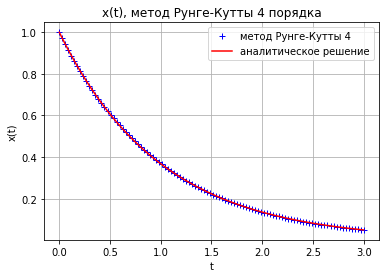

In [26]:
N = list(res_rk4.keys())[10]
print("N =", N)
plt.plot(res_rk4[N][0], res_rk4[N][1], 'b+', label="метод Рунге-Кутты 4")
plt.plot(res_rk4[N][0], [solution(t) for t in res_rk4[N][0]], 'r', label="аналитическое решение")
plt.grid()
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('x(t), метод Рунге-Кутты 4 порядка')
plt.legend()
plt.show()

**График зависимости максимальной ошибки от N:**

Максимальная ошибка - модуль разности вычисленного значения и аналитического решения в данной точке. Максимум вычисляется по всем точкам заданного интервала по $t$ для каждого значения `N`.

In [27]:
err_rk4 = calculate_err(res_rk4, solution)

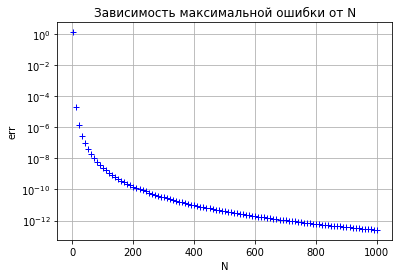

In [28]:
plt.plot(list(res_rk4.keys())[0:], err_rk4[0:], 'b+')
plt.grid()
plt.xlabel('N')
plt.ylabel('err')
plt.title('Зависимость максимальной ошибки от N')
plt.yscale('log')
plt.show()

### Сравню ошибки для трех методов

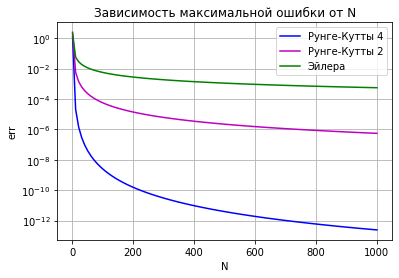

In [29]:
err_rk4 = calculate_err(res_rk4, solution)
err_rk2 = calculate_err(res_rk2, solution)
err_euler = calculate_err(res_euler, solution)


plt.plot(list(res_rk4.keys())[0:], err_rk4[0:], 'b', label='Рунге-Кутты 4')
plt.plot(list(res_rk2.keys())[0:], err_rk2[0:], 'm', label='Рунге-Кутты 2')
plt.plot(list(res_euler.keys())[0:], err_euler[0:], 'g', label='Эйлера')
plt.grid()
plt.xlabel('N')
plt.ylabel('err')
plt.title('Зависимость максимальной ошибки от N')
plt.yscale('log')
plt.legend()
plt.show()